In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'figures/002_waypointplots'
!mkdir -p $folder


data = pd.read_csv('data.csv', index_col=0)
data.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.756519,0.123426,0.156010,0.397855,0.689124,0.822287,0.059486,0.032697,0.175249,0.673825
1,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416175,0.688381,0.876422,0.153659,0.406306,0.714781,0.452631,0.890333,0.495503,0.194227
2,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400526,0.012098,0.391870,0.681438,0.714112,0.587022,0.997617,0.179406,0.094149,0.551203
3,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153326,0.399814,0.843777,0.106176,0.125045,0.765685,0.582473,0.797105,0.886579,0.486906
4,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.569110,0.288521,0.049904,0.312614,0.213312,0.666463,0.798311,0.552320,0.399732,0.078480


In [2]:
waypoints = pd.read_csv('waypoints.csv', index_col=0)
waypoints.head()

,0,1
perfect_middle_noise0_iter0,0.00,0.0
middle0_00_noise0_iter0,0.01,0.0
middle0_01_noise0_iter0,0.02,0.0
middle0_02_noise0_iter0,0.03,0.0
middle0_03_noise0_iter0,0.04,0.0


In [3]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

,Feature ID,Sample ID,$\Psi$,Iteration,% Noise
0,perfect_middle_noise0_iter0,0,0.5,0,0
1,perfect_middle_noise0_iter0,1,0.5,0,0
2,perfect_middle_noise0_iter0,2,0.5,0,0
3,perfect_middle_noise0_iter0,3,0.5,0,0
4,perfect_middle_noise0_iter0,4,0.5,0,0


In [4]:
import bonvoyage

In [7]:
plot_kinds = 'scatter', 'hex'

In [8]:
folder

'figures/002_waypointplots'

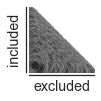

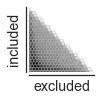

In [9]:

for kind in plot_kinds:
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    if kind == 'scatter':
        kwargs = {'rasterized': True, 'alpha': 0.5}
    else:
        kwargs = {}
    
    bonvoyage.waypointplot(waypoints, kind=kind, **kwargs)
    fig.tight_layout()
    fig.savefig('{}/waypoints_all_{}.pdf'.format(folder, kind), dpi=300)

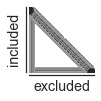

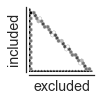

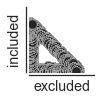

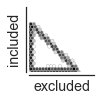

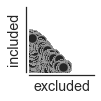

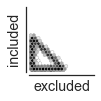

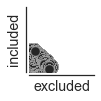

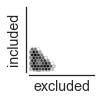

In [10]:
noise_percentages = 0, 25, 50, 75

for noise_percentage in noise_percentages:
    
    rows = metadata['% Noise'] == noise_percentage
    feature_ids = metadata.loc[rows, 'Feature ID']
    
    waypoints_subset = waypoints.loc[feature_ids]
    for kind in plot_kinds:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))
        kwargs = {'rasterized': True, 'alpha': 0.5} if kind == 'scatter' else {}
        
        bonvoyage.waypointplot(waypoints_subset, kind=kind, **kwargs)
        fig.tight_layout()
        fig.savefig('{}/waypoints_noise{}_{}.pdf'.format(folder, noise_percentage, kind), dpi=300)

In [22]:
tidy_metadata = pd.read_csv('metadata.csv')
print(tidy_metadata.shape)
tidy_metadata.head()

(5730000, 9)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [23]:
noise_levels = tidy_metadata['% Noise'].isin([0, 25, 50, 75])

perfects = tidy_metadata['Feature ID'].str.contains('perfect')
middles = tidy_metadata['Feature ID'].str.startswith('middle') & tidy_metadata['id1'].isin(['25', '50', '75'])
bimodals = tidy_metadata['Feature ID'].str.startswith('bimodal') & tidy_metadata['id1'].isin(['25', '50', '75'])

row_subsets = perfects, bimodals, middles


In [24]:
dfs = []

for rows in row_subsets:
    df = tidy_metadata.loc[rows & noise_levels]
    dfs.append(df)
tidy_subset = pd.concat(dfs, ignore_index=True)
six.print_(tidy_subset.shape)
tidy_subset.head()

(37200, 9)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [25]:
for group, df in tidy_subset.groupby('0'):
    palette = None
    six.print_(group)
    
    if group == 'bimodal':
        palette = "RdBu"
    elif group == 'middle0':
        palette = 'YlGnBu'
    elif group == 'middle1':
        palette = 'YlOrRd'
    elif group == 'perfect':
        palette = [MODALITY_TO_COLOR[m] for m in df[1].unique()]
        
    waypoints_subset = waypoints.loc[df['Feature ID']]
    data = pd.concat([waypoints_subset, df], axis=1)
    
    g = sns.FacetGrid(col='% Noise', data=data, 
                      aspect=1, size=1.5, sharex=False, palette=palette)
    g.map_dataframe(bonvoyage.waypointplot, kind=scatter, palette=palette)
    g.set(ylim=(0, 1), yticks=(0, 0.5, 1), xlabel='')
    if group == 'perfect':
        for ax in g.axes.flat:
            plt.setp(ax.get_xticklabels(), rotation=30)
    g.savefig('{}/data_{}_waypoints.pdf'.format(figure_folder, group))

KeyError: '0'